# Algebra lineal con **SciPy**

Referencias:

* https://docs.scipy.org/doc/scipy/reference/linalg.html
* https://www.datacamp.com/cheat-sheet/scipy-cheat-sheet-linear-algebra-in-python

## **Ejercicio 1)** Importando librerías

Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

## **Ejercicio 2)** Inversa de una matriz

Referencias:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.inv.html#scipy.linalg.inv

**1)** Use `linalg.inv()` para calcular la inversa $A^{-1}$ de la matriz

\begin{equation}
A = \bigg(
\begin{array}{cc}
1 & 2 \\
3 & 4
\end{array}
\bigg)
\end{equation}

**2)** Use `np.dot()` para chequear que $A^{-1}A \approx \mathbb{I}$, donde $\mathbb{I}$ es la matriz identidad.

**3)** Chequee que $AA^{-1} \approx \mathbb{I}$.

In [2]:
# 2.1)
A = np.array([[1,2],[3,4]])
A_inv = linalg.inv(A)
A_inv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [3]:
#2.2)
np.dot(A,A_inv)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

## **Ejercicio 3)** Sistema de ecuaciones lineales

Referencias:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve.html#scipy.linalg.solve

**1)** Use `linalg.solve()` para resolver el sistema $Ax=b$ donde, $x$ es la incógnita,

\begin{equation}
A = \left(
\begin{array}{cc}
3 & 2 & 0 \\
1 & -1 & 0 \\
0 & 5 & 1
\end{array}
\right)
\end{equation}

y

\begin{equation}
b = \left(
\begin{array}{cc}
2 \\
4 \\
1
\end{array}
\right)
\end{equation}

**2)** Chequee que $Ax=b$.

In [4]:
# 3.1)
A = np.array([[3,2,0],[1,-1,0],[0,5,1]])
b = np.array([2,4,1])
x = linalg.solve(A,b)

In [5]:
#3.2)
np.dot(A,x)

array([2., 4., 1.])

## **Ejercicio 4)** Cuadrados mínimos

Dada una matriz $X$ de dimensiones $n\times m$ y un vector $y$ de dimensión $n$, la función `linalg.lstsq(X,y,...)` se usa para encontrar el vector $y$ de dimensión $m$ que minimize la norma L2 dada por $|y-Xc|$ con respecto al vector $c$ de dimensión $m$. Notar que minimizar esta cantidad no necesariamente implica que $Xc=y$. Minimizar $|y-Xc|$ es útil para infinidad de problemas. En particular, es útil para ajustar polinomios a curvas obtenidas de datos.

Referencias:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html#scipy.linalg.lstsq

**1)** Use `linalg.lstsq(X,y)` para encontrar los coeficientes $c_0$, $c_1$ y $c_2$ del polinomio $p(x)=c_0+c_1x+c_2x^2$ que ajuste lo mejor posible los siguientes datos

    x = np.array([1.0, 2.5, 3.5, 4.0, 5.0, 7.0, 8.5])
    y = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

de acuerdo al método de cuadrados mínimos

\begin{eqnarray}
\min_{c_0,c_1,c_2} \sum_i (y_i-p(x_i))^2
\end{eqnarray}

**Ayuda:** Utilizar la matriz $X$ de entradas $X_{ij}=x_i^j$, i.e. la $j$-ésima potencia de $x_i$.

**2)** Con el fin de evaluar la bondad del ajuste, grafique en una misma figura:

* con símbolos los puntos $(x_i,y_i)$, y
* con una curva el polinomio ajustado $p(x)$ vs $x$.

In [6]:
# 4.1)
x_data = np.array([1.0, 2.5, 3.5, 4.0, 5.0, 7.0, 8.5])
y_data = np.array([0.3, 1.1, 1.5, 2.0, 3.2, 6.6, 8.6])

X = np.column_stack([x_data**0, x_data**1, x_data**2])
c = linalg.lstsq(X, y_data)[0]

c

array([0.0578403 , 0.07701453, 0.11262261])

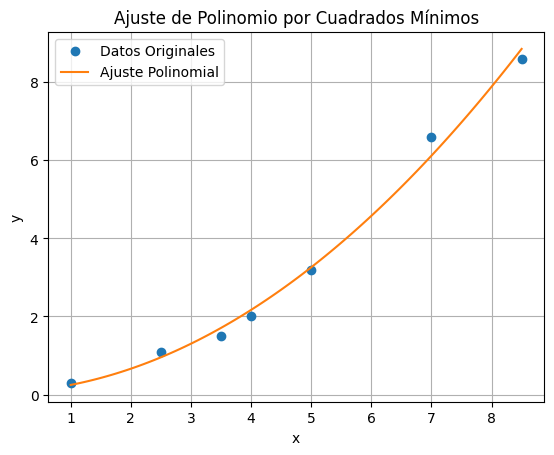

In [7]:
#4.2)
x_fit = np.linspace(x_data.min(), x_data.max(), 100)

y_fit = c[0] + c[1] * x_fit + c[2] * x_fit**2

plt.plot(x_data, y_data,'o', label='Datos Originales')

plt.plot(x_fit, y_fit,'-', label='Ajuste Polinomial')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de Polinomio por Cuadrados Mínimos")
plt.legend()
plt.grid(True)
plt.show()

## **Ejercicio 5)** pseudo-inversa de Moore-Penrose de una matriz

La pseudo-inversa de Moore-Penrose es una generalización de la noción de inversa, que resulta útil porque existe para cualquier matriz de dimensiones y entradas arbitrarias sobre los números reales o complejos.

Si una matriz $A$ es invertible (y por ende cuadrada), existe una matriz $B$ tal $AB=BA=\mathbb{I}$. Dicha matríz $B$ es única (para la $A$ dada) y, por ende, se la denota por $A^{-1}$ y se la denomina inversa de $A$.

Si $A$ no es invertible, luego no existe una matriz $B$ para la cual se cumpla la primera condición $AB=BA=\mathbb{I}$. Sin embargo, se puede ver que siempre existe una matriz $B$ para la cual se cumple:

* $ABA = A$,
* $BAB=B$,
* $AB$ es hermitiana, y
* $BA$ es hermitiana.

Dicha matriz $B$ es única (para la $A$ dada) y, por ende, se la denota por $A^+$ y se la denomina matríz pseudo-inversa de Moore-Penrose de $A$.

Referencias:

* https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.pinv.html#scipy.linalg.pinv

**1)** Cree una matriz $A$ de dimensiones $n\times m$ con $n=9$ y $m=6$ de números aleatorios generados a partir de la distribución normal de media 0 y varianza 1.

**2)** Use `linalg.pinv()` para computar la psuedo-inversa de Moore-Penrose $A^+$ de $A$.

**3)** Que dimensiones tiene $A^+$?

**4)** Use `np.allclose()` para verifique que $AA^+A\approx A$.

**5)** Verifique que $A^+AA^+\approx A^+$.

In [8]:
# 5.1)
# Dimensiones
n, m = 9, 6
# Crear la matriz A
A = np.random.randn(n, m)
print("Matriz A:")
print(A)

Matriz A:
[[ 0.31871294  0.98543984 -0.21931707 -0.04972221  0.19027681  1.42717582]
 [ 0.74750211  0.6689175  -0.40659772 -0.38157617 -1.48868395  0.16116732]
 [ 0.90122625 -1.30164725  0.72118366 -0.66375169 -0.2773768  -1.02895731]
 [ 0.70038635 -0.03299199 -1.04767794 -0.60454237 -0.00820887 -0.73021558]
 [ 0.87654232 -0.56181148 -1.80799539 -0.87468988  1.45092187  1.36802232]
 [-0.23882673 -0.42469467  0.31626294  0.36160938 -1.35470338 -0.84875977]
 [-0.37265453 -1.29029125 -1.1802734   0.60034625  0.75952872  0.40486696]
 [ 0.02756561  0.62763732 -2.32266262  0.77692017  1.29244672 -0.27378313]
 [-0.67932182  0.85413644  0.35732736  0.70991596 -0.77992419  0.04981775]]


In [9]:
# 5.2) Calcular la pseudo-inversa de Moore-Penrose de A
A_plus = np.linalg.pinv(A)
print("Pseudo-inversa de A (A+):")
print(A_plus)

Pseudo-inversa de A (A+):
[[ 0.81818348  0.30530589  1.07762802 -0.46801028 -0.2745264  -0.08316852
   0.04632577  0.57348696 -0.13225696]
 [ 0.06205331 -0.00157809 -0.16346212  0.11056146 -0.09787936 -0.16483258
  -0.36139652  0.14043128  0.06011157]
 [ 0.23258237 -0.13711203  0.31947702 -0.28111103 -0.19474574 -0.14571216
  -0.11518603 -0.01920125 -0.04539439]
 [ 0.72411394  0.14568432  0.81183622 -0.68366236 -0.45813069  0.07997832
   0.37057833  0.65751368  0.07633984]
 [ 0.05861307 -0.33175428  0.1405881  -0.07965785 -0.05100496 -0.28154517
  -0.13867162  0.1860542  -0.11637791]
 [ 0.2829555   0.1297144  -0.04372054 -0.25071242  0.16026315  0.00603411
   0.20686935 -0.17231889  0.04319184]]


In [10]:
# 5.3) Dimensiones de A+
dim_A_plus = A_plus.shape
print(f"Dimensiones de A+: {dim_A_plus}")

Dimensiones de A+: (6, 9)


In [11]:
# 5.4) Verificar que A*(A+)*A = A
check_A = np.allclose(np.dot(A, np.dot(A_plus, A)), A)
print(f"A*(A+)*A = A?: {check_A}")

A*(A+)*A = A?: True


In [12]:
# 5.5) Verificar que (A+)*A*(A+) = A+
check_A_plus = np.allclose(np.dot(A_plus, np.dot(A, A_plus)), A_plus)
print(f"(A+)*A*(A+) = A+?: {check_A_plus}")

(A+)*A*(A+) = A+?: True


## **Ejercicio 6)** Producto de Kronecker

Considere las matrices

\begin{equation}
A = \left(
\begin{array}{cc}
A_{11} & \dots & A_{1m} \\
\vdots & \ddots & \vdots \\
A_{nm} & \dots & A_{nm}
\end{array}
\right)
\end{equation}

y

\begin{equation}
B = \left(
\begin{array}{cc}
B_{11} & \dots & B_{1s} \\
\vdots & \ddots & \vdots \\
B_{r1} & \dots & B_{rs}
\end{array}
\right)
\end{equation}

El producto de Kronecker es la matriz de dimensiones $nr\times ms$ dada por

\begin{equation}
A\otimes B
=
\left(
\begin{array}{cc}
A_{11}B & \dots & A_{1m}B \\
\vdots & \ddots & \vdots \\
A_{n1}B & \dots & A_{nm}B
\end{array}
\right)
=
\left(
\begin{array}{cc}
B_{11}A & \dots & B_{1s}A \\
\vdots & \ddots & \vdots \\
B_{r1}A & \dots & B_{rs}A
\end{array}
\right)
\end{equation}

donde $A_{ij}B$ es un bloque de la matriz $A\otimes B$ igual al producto del escalar $A_{ij}$ por la matriz $B$.
Idem para $B_{ij}A$.

Referencias:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.kron.html#scipy.linalg.kron

**1)** Use `linalg.kron()` para calcular el producto de Kronecker de las matrices

\begin{equation}
A = \left(
\begin{array}{cc}
1 & 2 \\
3 & 4 \\
\end{array}
\right)
\end{equation}

y

\begin{equation}
B = \left(
\begin{array}{cc}
1 \\
1 \\
1 \\
\end{array}
\right)
\end{equation}

Que dimensiones tiene $A\otimes B$ en este caso?

**2)** Repita para las matrices

\begin{equation}
A = \left(
\begin{array}{cc}
1 & 2 \\
3 & 4 \\
\end{array}
\right)
\end{equation}

y

\begin{equation}
B = \left(
\begin{array}{cc}
1 & 1 & 1
\end{array}
\right)
\end{equation}

Que dimensiones tiene $A\otimes B$ en este otro caso?

In [13]:
# 6.1)
A = np.array([[1, 2],[3, 4]])
B = np.array([[1],[1],[1]])
# Calculamos el producto de Kronecker
kron_product_1 = np.kron(A, B)
print("\nProducto de Kronecker A_k_B (caso 1):\n", kron_product_1)
print(f"\nLa forma de A prodkron B es: {kron_product_1.shape}")


Producto de Kronecker A_k_B (caso 1):
 [[1 2]
 [1 2]
 [1 2]
 [3 4]
 [3 4]
 [3 4]]

La forma de A prodkron B es: (6, 2)


In [14]:
#6.2)
B = np.array([1,1,1])
kron_product_1 = np.kron(A, B)
print("\nProducto de Kronecker A_k_B (caso 1):\n", kron_product_1)
print(f"\nLa forma de A prodkron B es: {kron_product_1.shape}")


Producto de Kronecker A_k_B (caso 1):
 [[1 1 1 2 2 2]
 [3 3 3 4 4 4]]

La forma de A prodkron B es: (2, 6)


## **Ejercicio 7)** Autovalores y autovectores

Considere una matriz $A$ de $n\times m$. Luego, existen un conjunto de escalares $\{\lambda_1,...,\lambda_n\}$ y un correspondiente conjunto de vectores distintos $\{v_1,...,v_n\}$ tales que

\begin{eqnarray}
Av_i = \lambda_i v_i \;\;\;\; (1)
\end{eqnarray}

para todo $i\in\{1,...,n\}$. Estos $\lambda_i$ y $v_i$ se denominan autovalores y autovectores a derecha de $A$, respectivamente. Los autovalores pueden repetirse, pueden ser nulos y se los suele ordenar de mayor a menor en orden descendiente de sus valores absolutos: $|\lambda_1|\geq |\lambda_2|\geq ...\geq |\lambda_n|\geq 0$. Los autovectores pueden normalizarse, ya que si $v_i$ es autovector, luego $v_i/|v_i|$ también lo es.

Los autovectores constituyen una base del dominio de $A$. Esto es muy útil porque permite escribir cualquier vector $v$ en el dominio de $A$ como una combinación linal de sus autovectores

\begin{eqnarray}
v = \sum_i c_i v_i
\end{eqnarray}

Luego, calcular el producto de $A$ con $v$ resulta muy simple

\begin{eqnarray}
Av = A\left(\sum_i c_i v_i\right) = \sum_i c_iAv_i = \sum_i c_i\lambda_iv_i
\end{eqnarray}

Análogamente, existen un conjunto de escalares $\{\mu_1,...,\mu_m\}$ y un correspondiente conjunto de vectores diferentes $\{u_1,...,u_m\}$ de $A$, llamados autovalores y autovectores a izquierda de $A$, respectivamente, y son tales que

\begin{eqnarray}
u_jA = \mu_j u_j \;\;\;\; (2)
\end{eqnarray}

para todo $j\in\{1,...,m\}$.

**1)** Use `linalg.eigvals()` para calcular los autovalores a derecha de la matriz

\begin{equation}
A = \left(
\begin{array}{cc}
0 & -1 \\
1 &  0
\end{array}
\right)
\end{equation}

Referencias:

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html#scipy.linalg.eig

**2)** Use `linalg.eig()` para calcular los autovalores y los correspondientes autovectores a derecha de $A$.

**3)** Verifique que la ecuación $(1)$ se cumple.

**4)** Use `linalg.eig()` para calcular los autovalores y los correspondientes autovectores a izquierda de $A$.

**5)** Verifique que la ecuación $(2)$ se cumple.

In [15]:
# 7.1)
A = np.array([[0,-1],[1,0]])
eigenvalues = linalg.eigvals(A)
eigenvalues

array([0.+1.j, 0.-1.j])

In [16]:
#7.2)
lambdas_r,right_vectors = linalg.eig (A)
print ("Autovalores ( lambda ):\n", lambdas_r )
print ("Autovectores a derecha (v):\n", right_vectors )

Autovalores ( lambda ):
 [0.+1.j 0.-1.j]
Autovectores a derecha (v):
 [[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


In [17]:
#7.3)
lambda_1 = lambdas_r [0]
v_1 = right_vectors [: , 0] # Primera columna

lado_izquierdo =  np.dot(A,v_1)

lado_derecho = lambda_1 * v_1

np.allclose (lado_izquierdo,lado_derecho) 

True

## **Ejercicio 8)** Singular Value Decomposition (SVD)

Una matriz compleja $A$ de dimensiones $n\times m$ se la puede pensar como una transformación lineal $A:V\to W$ desde un espacio vectorial $V$ de dimensión $m$ a un espacio vectorial $W$ de dimensión $n$.
A $V$ se lo suele llamar espacio de salida y a $W$ espacio de llegada.

Cualquiera sea $A$, siempre existen matrices $L$, $D$ y $R$, de dimensiones $n\times n$, $n\times m$ y $m\times m$, respectivamente, tales que $L$ y $R$ son unitarias, $D$ es diagonal y

\begin{eqnarray}
A = LDR^{\dagger} \;\;\;\; (1)
\end{eqnarray}

Los valores diagonales

\begin{eqnarray}
\sigma_i := D_{ii}
\end{eqnarray}

están definidos para todo $i\in \{1,...,k\}$, donde $k=\min(n,m)$,
se los denomina valores singulares de $A$, son todos reales y no-negativos.
La descomposición siempre puede realizarse de manera tal que $\sigma_1\geq \sigma_2 \geq ... \geq \sigma_k\geq 0$.
El número de valores singulares no nulos es el rango de $A$.

Los vectores columna $l_1,...,l_n$ de $L$ forman una base ortonormal del espacio vectorial de llegada $W$.
Los vectores columna $r_1,...,r_m$ de $R$ forman una base ortonormal del espacio vectorial de salida $V$.
Usando estas propiedades, la ecuación $(1)$ puede reescribirse como

\begin{eqnarray}
A = \sum_{i=1}^k \sigma_i \, (l_i \otimes r_i^{\dagger}) \;\;\;\; (2)
\end{eqnarray}

donde $l_i \otimes r_i^{\dagger}$ es la matriz de dimensiones $n\times m$ resultante del [producto de Kronecker](https://en.wikipedia.org/wiki/Kronecker_product) entre la matriz $l_i$ de dimensiones $n\times 1$ y la matriz $r_i^{\dagger}$ de dimensiones $1\times m$.
En otras palabras, la $jk$-esima entrada de la matriz $l_i \otimes r_i^{\dagger}$ es

\begin{eqnarray}
(l_i \otimes r_i^{\dagger})_{jk}
=
(l_i)_{j1}
(r_i^{\dagger})_{1k}
\end{eqnarray}

para cada $j\in \{1,...,n\}$ y $k \in \{1,...,m\}$, donde

\begin{eqnarray}
(r_i^{\dagger})_{1k}
=
(r_i)_{k1}^*
\end{eqnarray}

i.e. es el complejo conjugado de la $k1$-esima entrada de la traspuesta de la matriz $r_i$.

Referencias:

* https://en.wikipedia.org/wiki/Singular_value_decomposition
* https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html#scipy.linalg.svd

**1)** Cree una matriz compleja $A$ de dimensiones $n\times m$ con $n=9$ y $m=6$, cuyas entradas $a_{ij} = x_{ij} + i y_{ij}$ se computen generando números aleatorios $x_{ij}$ e $y_{ij}$ a partir de una distribución normal de media 0 y varianza 1.

**2)** Use `linalg.svd()` para calcular la SVD de $A$. Dicha función retorna 3 arrays, digamos `L`, `s` y `Rc`, donde `L` denota a la matriz $L$, `s` denota al vector de valores singulares $(\sigma_1,\sigma_2,...,\sigma_k)$ y `Rc` denota a la matriz compleja conjugada $R^{\dagger}$.
Inspeccione las dimensiones de los arrays retornados.

**3)** Use el vector `s` para crear la matriz diagonal $D$ de dimensiones $n\times m$.

**4)** Use `np.allclose()` para verificar numéricamente la ecuación $(1)$.

In [22]:
# 8.1)
n, m = 9, 6
# Creamos la parte real y la parte imaginaria con numeros aleatorios
# de una distribución normal estándar (media 0 y varianza 1).
real_part = np.random.randn(n, m)
imag_part = np.random.randn(n, m)
# Combinamos para crear la matriz compleja A. ’1j’ es la unidadimaginaria.
A = real_part + 1j * imag_part
print(f"La forma de la matriz A es: {A.shape}")
print(f"El tipo de dato de A es: {A.dtype}")

La forma de la matriz A es: (9, 6)
El tipo de dato de A es: complex128


In [24]:
# 8.2)
L, s, Rc = linalg.svd(A)
print(f"Forma de L (matriz unitaria de llegada): {L.shape}")
print(f"Forma de s (vector de valores singulares): {s.shape}")
print(f"Forma de Rc (matriz R conjugada transpuesta): {Rc.shape}")

Forma de L (matriz unitaria de llegada): (9, 9)
Forma de s (vector de valores singulares): (6,)
Forma de Rc (matriz R conjugada transpuesta): (6, 6)


array([8.02020101, 5.76025751, 3.80145291, 3.35455437, 2.82495202,
       0.77782702])

In [25]:
#8.3)
D = np.zeros((n, m), dtype=complex)
# Poblamos la diagonal principal de D con los valores singulares de s
# np.diag(s) crea una matriz cuadrada 6x6, la insertamos en D
D[:m, :m] = np.diag(s)
print(f"La forma de la matriz diagonal D es: {D.shape}")
# Para visualizarlo, imprimimos D (mostrará los sigmas en la diagonal)
print("\nMatriz D (primeras 6 filas):\n", D[:6])

La forma de la matriz diagonal D es: (9, 6)

Matriz D (primeras 6 filas):
 [[8.02020101+0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 5.76025751+0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 3.80145291+0.j 0.        +0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 3.35455437+0.j
  0.        +0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  2.82495202+0.j 0.        +0.j]
 [0.        +0.j 0.        +0.j 0.        +0.j 0.        +0.j
  0.        +0.j 0.77782702+0.j]]


In [27]:
#8.4)
A_recons = np.dot(L, np.dot(D, Rc))
# Verificamos que la matriz reconstruida es numéricamente cercana a la original
son_iguales = np.allclose(A, A_recons)
print(f"Se cumple que A es aproximadamente igual a L*D*R_conjugada?: {son_iguales}")

Se cumple que A es aproximadamente igual a L*D*R_conjugada?: True
